In [ ]:
import streamlit as st
import matplotlib.pyplot as plt 
import plotly.express as px
import yfinance as yf
import altair as alt
import pandas as pd

def split_df(df, x: int):
    """
    Split df so the test set has exactly x rows.
    Train = all rows except last x.
    Test  = last x rows.
    """
    df = df.sort_index()

    test = df.iloc[-x:]     # last x rows
    train = df.iloc[:-x]    # everything before

    # Sanity check
    assert len(train) + len(test) == len(df), "train + test != total!"

    return train, test

def compute_log_returns(df):

    # Ensure datetime index
    if not isinstance(df.index, pd.DatetimeIndex):
        df = df.reset_index().set_index("Date")

    prices = df["Close"].astype(float)

    # Filter out non-positive prices to avoid log(<=0)
    prices = prices[prices > 0]

    log_returns = np.log(prices / prices.shift(1))
    log_returns = log_returns.dropna()

    # Make sure it's a Series
    if isinstance(log_returns, pd.DataFrame):
        log_returns = log_returns.iloc[:, 0]

    df["logReturns"] = log_returns
    df = df.dropna()
    return df 

In [82]:

from main import get_df, run_sim, calc_anualized_mu, calc_anualized_sigma
ticker = "AAPL"
BACK_TEST_DAYS_AMMOUNT = 30
SIM_DAYS = 30
NUM_SIMS = 1000


price_df = get_df(ticker)
#price_df 

train, test = split_df(price_df, BACK_TEST_DAYS_AMMOUNT)
 

# Calculate Need Statistics
log_returns_df = compute_log_returns(train)
anualized_mu = calc_anualized_mu(log_returns_df)
anualized_sigma = calc_anualized_sigma(log_returns_df)


 # Run Simulation
sim_df = run_sim(mu_annual=anualized_mu, sigma_annual=anualized_sigma, df=price_df, number_of_sims=NUM_SIMS, days=SIM_DAYS)
sim_df.iloc[-1].mean()


c:\Users\Justin\finance_ds_projects\Monte_Carlo\main.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  1 of 1 completed


252.17
245.21
251.1
246.13
237.74
235.52
243.79
248.27
255.78
251.19
262.55
262.71
257.52
263.77
266.87
263.92
263.87
262.85
266.83
280.49
271.45
273.5
269.36
273.8
270.87
276.54
281.58
285.4
266.81
261.45
261.96
260.98
255.9
258.84
253.53
247.64
244.36
249.99
248.23
239.34
236.09
229.13
227.79
235.63
242.26
231.28
243.95
238.84
234.11
232.94
221.13
217.51
208.27
205.81
206.05
199.65
199.65
187.32
180.83
188.71
254.41
251.77
251.57
252.35
250.56
251.88
249.27
259.33
251.44
246.42
261.08
249.06
257.86
243.68
259.81
256.76
262.24
258.82
252.3
258.39
250.44
251.82
241.4
241.48
241.27
245.89
251.32
242.47
246.09
248.06
251.28
242.9
237.76
237.77
242.14
246.98
236.95
241.21
240.3
240.52
244.86
237.29
231.23
232.57
221.07
220.58
214.89
222.21
229.1
232.31
238.92
229.7
225.46
219.17
206.92
210.19
209.51
203.05
195.78
193.87
254.19
257.53
253.84
246.44
246.9
249.4
238.79
235.24
230.54
234.31
246.39
245.74
236.81
241.96
236.04
236.61
241.7
249.15
256.77
249.77
257.12
253.6
254.55
250.62
256.81


np.float64(255.4654)

In [50]:
def compute_log_returns(df):

    df = df["Close"].pct_change().dropna()
    df = df.reset_index().set_index("Date")
    df = df.set_axis(['Returns'], axis=1)
    
    prices = df.iloc[:, 0].astype(float)

    # Remove zero or negative values
    prices = prices.replace([0], np.nan)
    prices = prices[prices > 0]
    prices = prices.dropna()

    # Compute log returns
    log_returns = np.log(prices / prices.shift(1))
    df = log_returns.to_frame(name="logReturns").dropna()
    return df 




log_returns_df = compute_log_returns(train_data)
log_returns_df

,logReturns
Date,
1980-12-18,0.158150
1980-12-19,0.744311
1980-12-22,-0.226287
1980-12-23,-0.142646
1980-12-24,0.220838
...,...
2025-10-23,0.771640
2025-10-24,1.049034
2025-10-27,0.602093


In [29]:

df = get_df("AAPL")
train, test = split_df(df)
train.tail(30).iloc[:1]


c:\Users\Justin\finance_ds_projects\Monte_Carlo\main.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2025-09-18,237.649628,240.966404,236.420808,239.7376,44249600


In [30]:
e = 25_000

last_price = train_df["adjclose"].iloc[-1]
n_days = 30

dt = 1  
mu = mu_daily
sigma = sigma_daily

data = {}
for i in range(e):
    prices = [last_price]
    for _ in range(n_days):
        eps = np.random.normal()
        next_price = prices[-1] * np.exp((mu - 0.5 * sigma**2) * dt 
                                         + sigma * np.sqrt(dt) * eps)
        prices.append(next_price)

    data[f"Sim_{i}"] = prices

sim_df = pd.DataFrame(data)
# sim_df.plot(
#     legend=False, 
#     title=f"Monte Carlo AAPL Stock Simulation With {e} Simulations",
#     xlabel="Simulation Day",
#     ylabel="Simulated Price"
# )


# Create x-axes
x1 = np.arange(-5, 31)          # -5 to 30
x2 = np.arange(0, 31)            # 0 to 30

plt.plot(x2, sim_df)
plt.plot(x1, train_df["adjclose"].iloc[-1], color="black")
plt.axhline(train_df["adjclose"].tail(36)[-1], color="black", linestyle="--", alpha=0.7, label=f"Break Even Line")
plt.plot()


NameError: name 'train_df' is not defined

/var/folders/cr/vk1gr2j557sfbvd9fb20cz3r0000gn/T/ipykernel_27305/1449097323.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  day_zero_price = round(float(train_df["adjclose"].tail(36)[-1]),2)


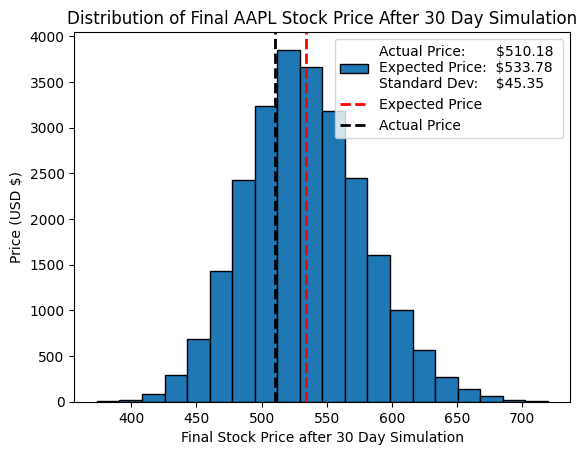

517.35
510.18
ROI: If bought at day 0 and sold at day 30: -1.41%


In [ ]:
data = np.array(sim_df.iloc[-1:].values.flatten())

mean = data.mean()
std = data.std()

final_price = round(float(df["adjclose"].tail(1).item()),2)
day_zero_price = round(float(train_df["adjclose"].tail(36)[-1]),2)

plt.hist(data, bins=20,edgecolor='black', 
         label=f"Actual Price:       ${final_price} \nExpected Price:  ${round(mean,2)} \nStandard Dev:    ${round(std,2)}")


plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label='Expected Price')
plt.axvline(x=final_price, color='black', linestyle='--', linewidth=2, label='Actual Price')
plt.title(f"Distribution of Final AAPL Stock Price After 30 Day Simulation")
plt.xlabel("Final Stock Price after 30 Day Simulation")
plt.ylabel("Price (USD $)")
plt.legend()
plt.show()

print(day_zero_price)
print(final_price)
print(f"ROI: If bought at day 0 and sold at day 30: {round(((final_price - day_zero_price) / final_price) * 100,2)}%")

In [ ]:
print(f"Last Actual price:                  | ${round(last_price,2)}")
print(f"Expected Price After 30 Day's:      | ${round(mean,2)}\n")
# ---------------------------------997----------------------------------------
lower_bound_997 = mean - 2.58 * std
upper_bound_997 = mean + 2.58 * std

# 99.7% CI of Expected Value
range = [float(lower_bound_997), float(upper_bound_997)]

print(f"99.7% CI of Expected Value: {range}")

# ---------------------------------95----------------------------------------
lower_bound_95 = mean - 1.96 * std
upper_bound_95 = mean + 1.96 * std

# 95% CI of Expected Value
range = [float(lower_bound_95), float(upper_bound_95)]

print(f"95% CI of Expected Value: {range}")


# ---------------------------------68----------------------------------------
lower_bound_68 = mean - 1 * std
upper_bound_68 = mean + 1 * std

# 66% CI of Expected Value
range = [float(lower_bound_68), float(upper_bound_68)]

print(f"68% CI of Expected Value: {range}")

Last Actual price:                  | $517.35
Expected Price After 30 Day's:      | $533.78

99.7% CI of Expected Value: [416.78384430496845, 650.7752869382725]
95% CI of Expected Value: [444.8990951640088, 622.6600360792321]
68% CI of Expected Value: [488.4323868167166, 579.1267444265244]
